In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

from tensorflow import keras
from keras.datasets import reuters
from keras import layers

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
len(train_data[10])

31

In [6]:
train_data[10][0:10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([
    (value, key) for (key, value) in word_index.items()
])
decoded_newswire = " ".join([
    reverse_word_index.get(i - 3, "?") for i in train_data[0]
])

550378/550378 [==============================] - 0s 0us/step


In [8]:
train_labels[10]

3

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [11]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [13]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 137ms/step - loss: 2.9520 - accuracy: 0.4639 - val_loss: 2.0217 - val_accuracy: 0.6120
Epoch 2/20
16/16 [==============================] - 3s 177ms/step - loss: 1.6451 - accuracy: 0.6729 - val_loss: 1.4230 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 2s 147ms/step - loss: 1.2029 - accuracy: 0.7409 - val_loss: 1.2057 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 2s 101ms/step - loss: 0.9627 - accuracy: 0.7949 - val_loss: 1.0870 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 2s 104ms/step - loss: 0.7973 - accuracy: 0.8325 - val_loss: 1.0178 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 2s 100ms/step - loss: 0.6657 - accuracy: 0.8644 - val_loss: 0.9534 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 2s 118ms/step - loss: 0.5590 - accuracy: 0.8825 - val_loss: 0.9003 - val_accuracy: 0.8150
Epoch 

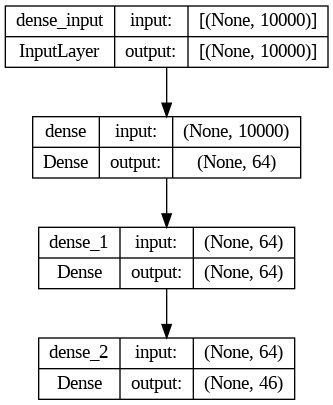

In [16]:
keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

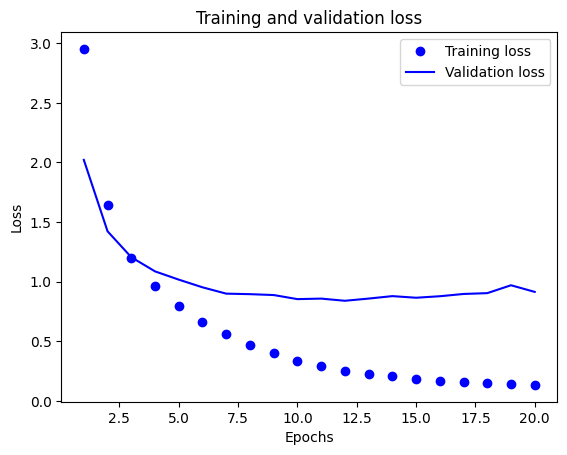

In [17]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

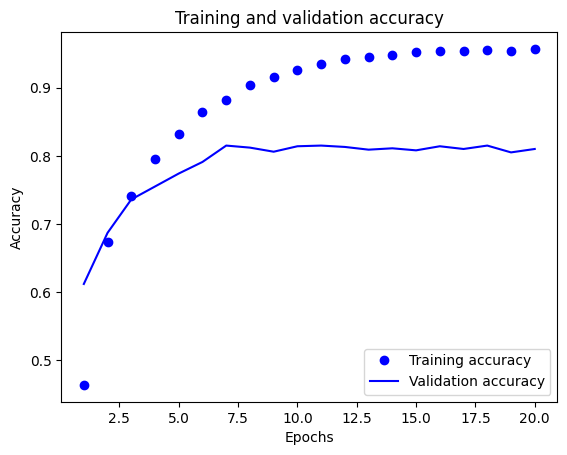

In [18]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 57ms/step - loss: 2.5394 - accuracy: 0.5207
Epoch 2/9
18/18 [==============================] - 1s 53ms/step - loss: 1.4328 - accuracy: 0.6935
Epoch 3/9
18/18 [==============================] - 1s 55ms/step - loss: 1.1120 - accuracy: 0.7613
Epoch 4/9
18/18 [==============================] - 1s 51ms/step - loss: 0.9076 - accuracy: 0.8093
Epoch 5/9
18/18 [==============================] - 1s 54ms/step - loss: 0.7496 - accuracy: 0.8395
Epoch 6/9
18/18 [==============================] - 1s 79ms/step - loss: 0.6184 - accuracy: 0.8675
Epoch 7/9
18/18 [==============================] - 1s 83ms/step - loss: 0.5137 - accuracy: 0.8917
Epoch 8/9
18/18 [==============================] - 1s 82ms/step - loss: 0.4345 - accuracy: 0.9083
Epoch 9/9
71/71 [==============================] - 1s 7ms/step - loss: 0.9225 - accuracy: 0.7894


In [20]:
results

[0.9224786162376404, 0.7894033789634705]

In [21]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.182546749777382

In [22]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 6ms/step


In [23]:
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

1.0000002

In [25]:
np.argmax(predictions[0])

3

In [26]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 30ms/step - loss: 3.8101 - accuracy: 0.0764
Epoch 2/9
18/18 [==============================] - 1s 28ms/step - loss: 3.7523 - accuracy: 0.0435
Epoch 3/9
18/18 [==============================] - 1s 31ms/step - loss: 3.6454 - accuracy: 0.0494
Epoch 4/9
18/18 [==============================] - 1s 30ms/step - loss: 3.5062 - accuracy: 0.0508
Epoch 5/9
18/18 [==============================] - 1s 30ms/step - loss: 3.3415 - accuracy: 0.0538
Epoch 6/9
18/18 [==============================] - 1s 29ms/step - loss: 3.1517 - accuracy: 0.0619
Epoch 7/9
18/18 [==============================] - 1s 30ms/step - loss: 2.9360 - accuracy: 0.2531
Epoch 8/9
18/18 [==============================] - 1s 29ms/step - loss: 2.7094 - accuracy: 0.3843
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 2.4543 - accuracy: 0.3931
